In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF

In [8]:
X = np.array([
    [3, 1, 1, 4, 1.5, 0.12, 0, 0.03, 0.1],
    [1, 4, 1, 1, 3, 2, 6, 0.5, 4],
    [0.1, 0.02, 0, 0.1, 0, 1.9, 3.5, 1, 3]
])

In [9]:
# Compute NMF using Multiplicative Update Algorithm
K = 100  # Maximum number of iterations
rank = 2  # Rank for factorization

nmf = NMF(n_components=rank, solver='mu', max_iter=K, random_state=42, init='random', alpha_W=0, alpha_H=0, l1_ratio=0)
W = nmf.fit_transform(X)
H = nmf.components_

In [10]:
# (b) Convergence Study
errors = []
for k in range(1, K+1):
    nmf = NMF(n_components=rank, solver='mu', max_iter=k, random_state=42, init='random', alpha_W=0, alpha_H=0, l1_ratio=0)
    W_k = nmf.fit_transform(X)
    H_k = nmf.components_
    error = np.linalg.norm(X - W_k @ H_k, 'fro')**2
    errors.append(error)

c:\Users\Wahaj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\Wahaj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 2 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\Wahaj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 3 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\Wahaj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 4 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\Wahaj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\decomposition\_nmf.py:1759: Con

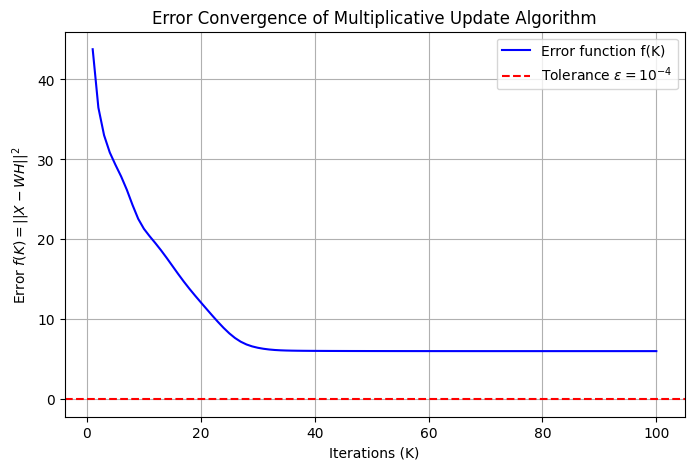

Minimum K for error < 10^-4: None


In [11]:
# (i) Plot error f(K) vs K
plt.figure(figsize=(8, 5))
plt.plot(range(1, K+1), errors, label='Error function f(K)', color='b')
plt.axhline(y=1e-4, color='r', linestyle='--', label='Tolerance $\\varepsilon = 10^{-4}$')
plt.xlabel('Iterations (K)')
plt.ylabel('Error $f(K) = ||X - WH||^2$')
plt.title('Error Convergence of Multiplicative Update Algorithm')
plt.legend()
plt.grid()
plt.show()

# (ii) Find smallest K where error < 10^{-4}
K_tolerance = next((k for k, err in enumerate(errors, 1) if err < 1e-4), None)
print(f"Minimum K for error < 10^-4: {K_tolerance}")
